Chapter 21
# 无向图的拉普拉斯矩阵
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

In [2]:
G = nx.Graph()
# 创建无向图的实例

In [3]:
G.add_nodes_from(['a', 'b', 'c', 'd'])
# 添加多个顶点

In [4]:
G.add_edges_from([('a','b'),('b','c'),
                  ('b','d'),('c','d'),
                  ('c','a')])
# 增加一组边

## 拉普拉斯矩阵

In [9]:
L = nx.laplacian_matrix(G).toarray()

In [10]:
L

array([[ 2, -1, -1,  0],
       [-1,  3, -1, -1],
       [-1, -1,  3, -1],
       [ 0, -1, -1,  2]], dtype=int32)

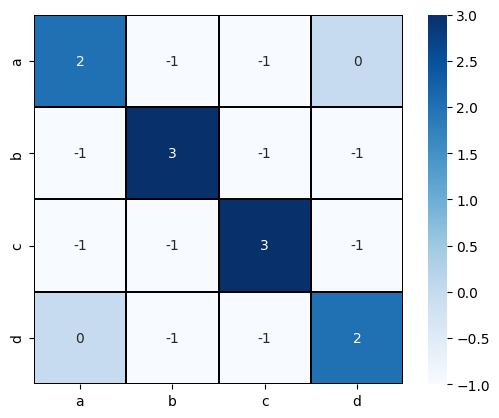

In [11]:
sns.heatmap(L, cmap = 'Blues', 
            annot = True, fmt = '.0f',
            xticklabels = list(G.nodes), 
            yticklabels = list(G.nodes),
            linecolor = 'k', square = True,
            linewidths = 0.2)
plt.savefig('拉普拉斯矩阵.svg')

## 验证拉普拉斯矩阵

In [5]:
A = nx.adjacency_matrix(G).todense()
A

array([[0, 1, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 0, 1],
       [0, 1, 1, 0]], dtype=int32)

In [6]:
D = A.sum(axis = 0)
D

array([2, 3, 3, 2], dtype=int32)

In [7]:
D = np.diag(D)
D

array([[2, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 2]], dtype=int32)

In [8]:
D - A

array([[ 2, -1, -1,  0],
       [-1,  3, -1, -1],
       [-1, -1,  3, -1],
       [ 0, -1, -1,  2]], dtype=int32)

## 归一化 (对称) 拉普拉斯矩阵

$$L_N = D^{-1/2} L D^{-1/2}$$

In [12]:
L_N = nx.normalized_laplacian_matrix(G).todense()

In [13]:
L_N

array([[ 1.        , -0.40824829, -0.40824829,  0.        ],
       [-0.40824829,  1.        , -0.33333333, -0.40824829],
       [-0.40824829, -0.33333333,  1.        , -0.40824829],
       [ 0.        , -0.40824829, -0.40824829,  1.        ]])

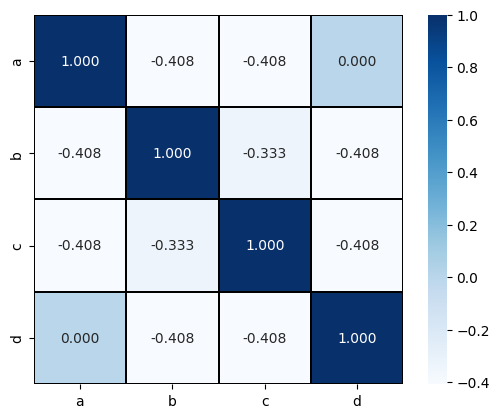

In [14]:
sns.heatmap(L_N, cmap = 'Blues', 
            annot = True, fmt = '.3f',
            xticklabels = list(G.nodes), 
            yticklabels = list(G.nodes),
            linecolor = 'k', square = True,
            linewidths = 0.2)
plt.savefig('归一化拉普拉斯矩阵.svg')

## 验证归一化拉普拉斯矩阵

In [15]:
D_sqrt_inv = np.diag(1/np.sqrt(A.sum(axis = 0)))
D_sqrt_inv

array([[0.70710678, 0.        , 0.        , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        ],
       [0.        , 0.        , 0.57735027, 0.        ],
       [0.        , 0.        , 0.        , 0.70710678]])

In [16]:
D_sqrt_inv @ L @ D_sqrt_inv

array([[ 1.        , -0.40824829, -0.40824829,  0.        ],
       [-0.40824829,  1.        , -0.33333333, -0.40824829],
       [-0.40824829, -0.33333333,  1.        , -0.40824829],
       [ 0.        , -0.40824829, -0.40824829,  1.        ]])